In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
# from sklearn import 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator

In [3]:
from scipy import stats
from scipy.stats import skew, boxcox_normmax, norm
from scipy.special import boxcox1p

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5]),
 [Text(0.5, 0, 'Id'),
  Text(1.5, 0, 'MSSubClass'),
  Text(2.5, 0, 'LotFrontage'),
  Text(3.5, 0, 'LotArea'),
  Text(4.5, 0, 'OverallQual'),
  Text(5.5, 0, 'OverallCond'),
  Text(6.5, 0, 'YearBuilt'),
  Text(7.5, 0, 'YearRemodAdd'),
  Text(8.5, 0, 'MasVnrArea'),
  Text(9.5, 0, 'BsmtFinSF1'),
  Text(10.5, 0, 'BsmtFinSF2'),
  Text(11.5, 0, 'BsmtUnfSF'),
  Text(12.5, 0, 'TotalBsmtSF'),
  Text(13.5, 0, '1stFlrSF'),
  Text(14.5, 0, '2ndFlrSF'),
  Text(15.5, 0, 'LowQualFinSF'),
  Text(16.5, 0, 'GrLivArea'),
  Text(17.5, 0, 'BsmtFullBath'),
  Text(18.5, 0, 'BsmtHalfBath'),
  Text(19.5, 0, 'FullBath'),
  Text(20.5, 0, 'HalfBath'),
  Text(21.5, 0, 'BedroomAbvGr'),
  Text(22.5, 0, 'KitchenAbvGr'),
  Text(23.5, 0, 'TotRmsAbvGrd'),
  Text(2

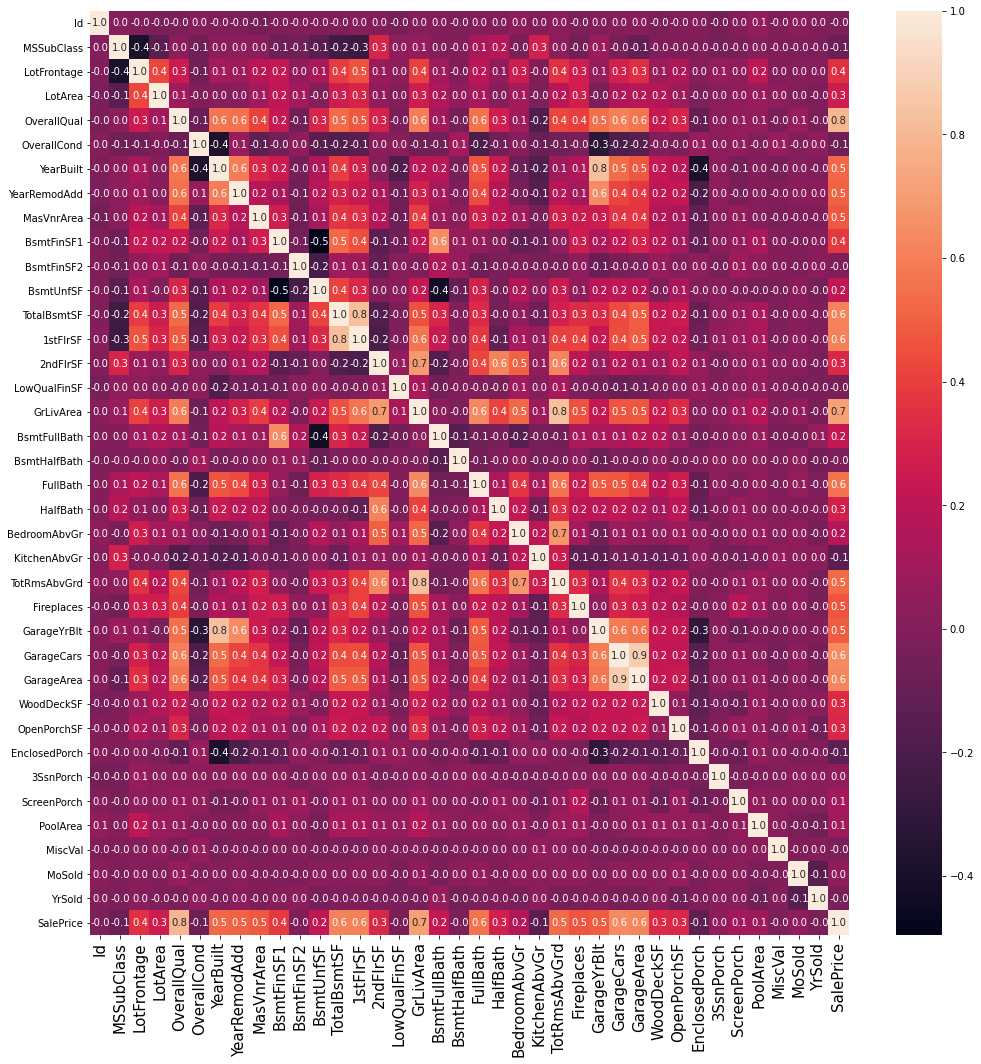

In [6]:
plt.figure(figsize = (17,17))

sns.heatmap(train.corr(), annot = True, fmt = '.1f')
plt.xticks(fontsize = 15)

Oberservations:
- quality is correlated with saleprice, GRLivArea also looks to be correlated with saleprice

In [7]:
train.drop('Id', axis = 1, inplace = True)
test.drop('Id', axis = 1, inplace = True)

In [8]:
y = train['SalePrice'].reset_index(drop=True)
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [9]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [10]:
train_features = train.drop(columns = {'SalePrice'})

In [11]:
def missing_percentage(df):
    
    """A function for returning missing ratios."""
    
    total = df.isnull().sum().sort_values(
        ascending=False)[df.isnull().sum().sort_values(ascending=False) != 0]
    percent = (df.isnull().sum().sort_values(ascending=False) / len(df) *
               100)[(df.isnull().sum().sort_values(ascending=False) / len(df) *
                     100) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])


,PoolQC,MiscFeature,Alley,Fence,FireplaceQu,LotFrontage,GarageCond,GarageType,GarageYrBlt,GarageFinish,GarageQual,BsmtExposure,BsmtFinType2,BsmtFinType1,BsmtCond,BsmtQual,MasVnrArea,MasVnrType,Electrical
Total,1453.000000,1406.000000,1369.000000,1179.000000,690.000000,259.000000,81.000000,81.000000,81.000000,81.000000,81.000000,38.000000,38.000000,37.000000,37.000000,37.000000,8.000000,8.000000,1.000000
Percent,99.520548,96.301370,93.767123,80.753425,47.260274,17.739726,5.547945,5.547945,5.547945,5.547945,5.547945,2.602740,2.602740,2.534247,2.534247,2.534247,0.547945,0.547945,0.068493


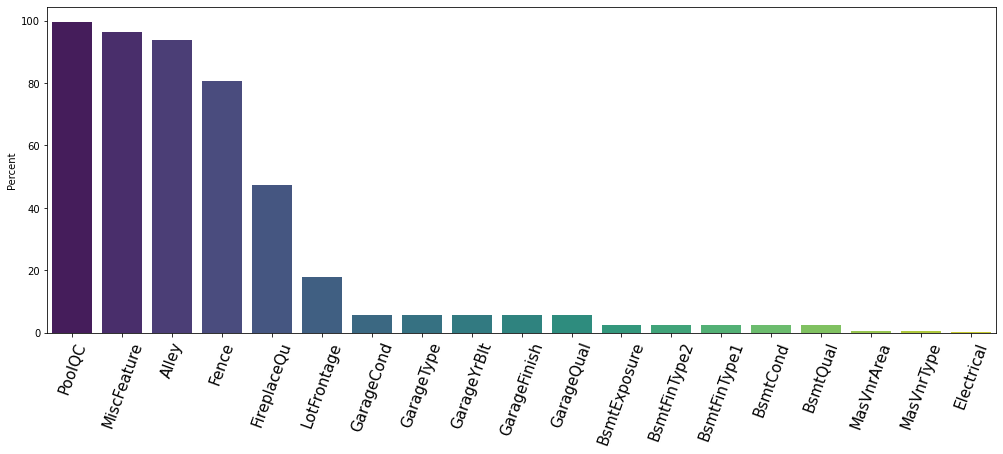

In [12]:
missing = missing_percentage(train_features)

fig, ax = plt.subplots(figsize=(17,6))
sns.barplot(x = missing.index, y = missing.Percent, data = missing, palette = 'viridis')
plt.xticks(rotation=70, fontsize = 15)

display(missing.T.style.background_gradient(cmap='viridis',axis = 1))

Let's disect all the columns with plentiful nulls
- POOLQC is pool area in square feet which means null values indicate there is no pool as part of the house
- MISCFeature is a miscellaneous feature not covered in other categories (tough to define across the board)
- Alley is type of alley access which means the property may not have an alley
- Fence indicates fence quality
- FireplaceQU is fire a rating system of fireplace quality
- lot fronage is the linear feet of street connected to the property

In [13]:
none_cols = [
    'Alley', 'PoolQC', 'MiscFeature', 'Fence', 'FireplaceQu', 'GarageType',
    'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond',
    'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType'
]

# List of 'NaN' including columns where NaN's mean 0.

zero_cols = [
    'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
    'BsmtHalfBath', 'GarageYrBlt', 'GarageArea', 'GarageCars', 'MasVnrArea'
]

# List of 'NaN' including columns where NaN's actually missing gonna replaced with mode.

freq_cols = [
    'Electrical', 'Exterior1st', 'Exterior2nd', 'Functional', 'KitchenQual',
    'SaleType', 'Utilities'
]

In [14]:
for col in zero_cols:
    train_features[col].replace(np.nan, 0, inplace = True)

for col in none_cols:
    train_features[col].replace(np.nan,'None',inplace=True)

for col in freq_cols:
    train_features[col].replace(np.nan, train_features[col].mode()[0],inplace=True)

In [15]:
train_features['MSZoning'] = train_features.groupby('MSSubClass')['MSZoning'].apply(
    lambda x: x.fillna(x.mode()[0]))

In [16]:
train_features['LotFrontage'] = train_features.groupby(
    ['Neighborhood'])['LotFrontage'].apply(lambda x: x.fillna(x.median()))

In [17]:
train_features['MSSubClass'] = train_features['MSSubClass'].astype(str)
train_features['YrSold'] = train_features['YrSold'].astype(str)
train_features['MoSold'] = train_features['MoSold'].astype(str)

In [18]:
train_features.columns[0]

'MSSubClass'

In [19]:
# transforming infrequent values
others = [
    'Condition1', 'Condition2', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
    'Heating', 'Electrical', 'Functional', 'SaleType'
]

for col in others:
    mask = train_features[col].isin(
        train_features[col].value_counts()[train_features[col].value_counts() < 10].index)
    train_features[col][mask] = 'Other'

/Users/lucasshwed/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/lucasshwed/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/lucasshwed/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [20]:
def srt_box(y, df):
    
    '''A function for displaying categorical variables.'''
    
    fig, axes = plt.subplots(14, 3, figsize=(29, 90))
    axes = axes.flatten()

    for i, j in zip(df.select_dtypes(include=['object']).columns, axes):

        sortd = df.groupby([i])[y].median().sort_values(ascending=False)
        sns.boxplot(x=i,
                    y=y,
                    data=df,
                    palette='plasma',
                    order=sortd.index,
                    ax=j)
        j.tick_params(labelrotation=45)
        j.yaxis.set_major_locator(MaxNLocator(nbins=18))

        plt.tight_layout()
    fig.savefig('cat_var.jpg')

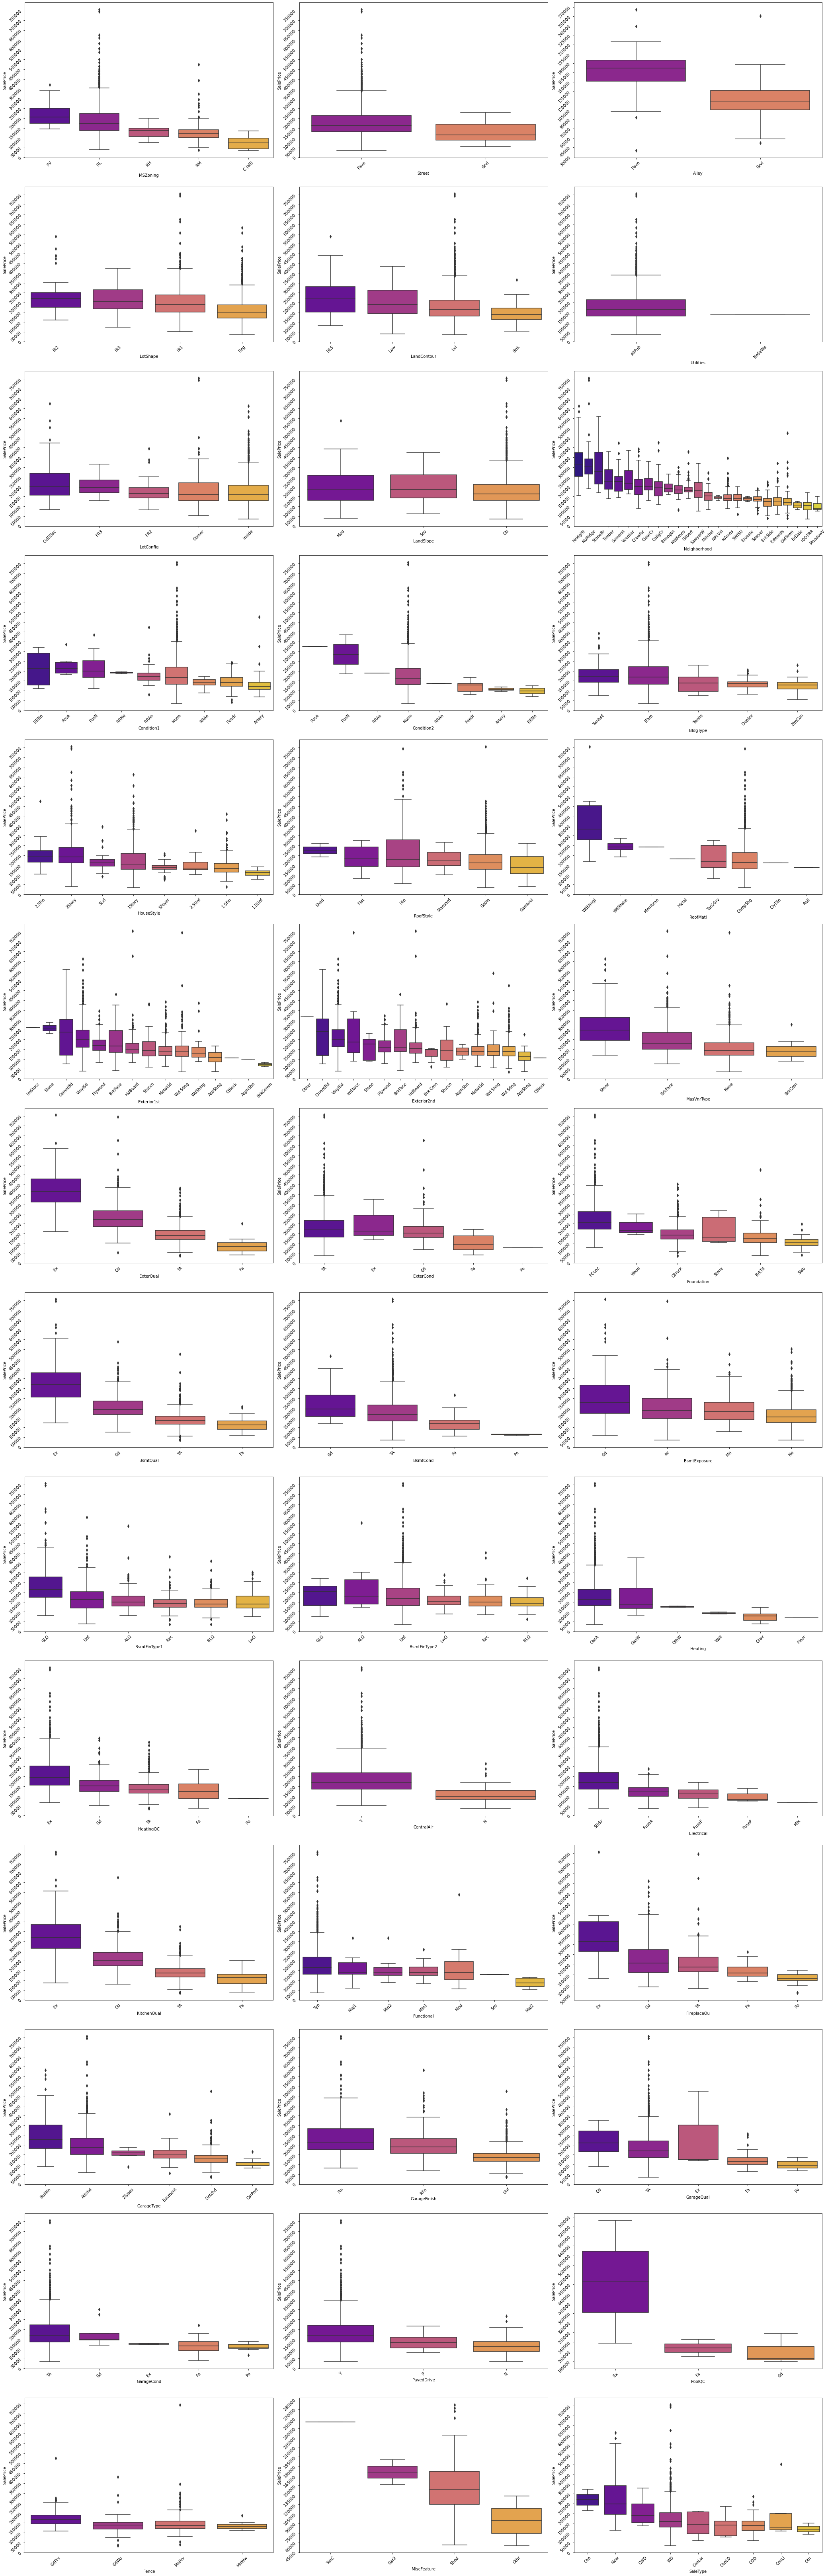

In [21]:
srt_box('SalePrice',train)

In [22]:
# Converting some of the categorical values to numeric ones. Choosing similar values 
# for closer groups to balance linear relations...

neigh_map = {
    'MeadowV': 1,
    'IDOTRR': 1,
    'BrDale': 1,
    'BrkSide': 2,
    'OldTown': 2,
    'Edwards': 2,
    'Sawyer': 3,
    'Blueste': 3,
    'SWISU': 3,
    'NPkVill': 3,
    'NAmes': 3,
    'Mitchel': 4,
    'SawyerW': 5,
    'NWAmes': 5,
    'Gilbert': 5,
    'Blmngtn': 5,
    'CollgCr': 5,
    'ClearCr': 6,
    'Crawfor': 6,
    'Veenker': 7,
    'Somerst': 7,
    'Timber': 8,
    'StoneBr': 9,
    'NridgHt': 10,
    'NoRidge': 10
}

train_features['Neighborhood'] = train_features['Neighborhood'].map(neigh_map).astype(
    'int')
ext_map = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
train_features['ExterQual'] = train_features['ExterQual'].map(ext_map).astype('int')
train_features['ExterCond'] = train_features['ExterCond'].map(ext_map).astype('int')
bsm_map = {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
train_features['BsmtQual'] = train_features['BsmtQual'].map(bsm_map).astype('int')
train_features['BsmtCond'] = train_features['BsmtCond'].map(bsm_map).astype('int')
bsmf_map = {
    'None': 0,
    'Unf': 1,
    'LwQ': 2,
    'Rec': 3,
    'BLQ': 4,
    'ALQ': 5,
    'GLQ': 6
}

train_features['BsmtFinType1'] = train_features['BsmtFinType1'].map(bsmf_map).astype('int')
train_features['BsmtFinType2'] = train_features['BsmtFinType2'].map(bsmf_map).astype('int')
heat_map = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
train_features['HeatingQC'] = train_features['HeatingQC'].map(heat_map).astype('int')
train_features['KitchenQual'] = train_features['KitchenQual'].map(heat_map).astype('int')
train_features['FireplaceQu'] = train_features['FireplaceQu'].map(bsm_map).astype('int')
train_features['GarageCond'] = train_features['GarageCond'].map(bsm_map).astype('int')
train_features['GarageQual'] = train_features['GarageQual'].map(bsm_map).astype('int')

In [23]:
# Plotting numerical features with polynomial order to detect outliers by eye.

def srt_reg(y, df):
    fig, axes = plt.subplots(12, 3, figsize=(29, 90))
    axes = axes.flatten()

    for i, j in zip(df.select_dtypes(include=['number']).columns, axes):

        sns.regplot(x=i,
                    y=y,
                    data=df,
                    ax=j,
                    order=3,
                    ci=None,
                    color='#e74c3c',
                    line_kws={'color': 'black'},
                    scatter_kws={'alpha':0.4})
        j.tick_params(labelrotation=45)
        j.yaxis.set_major_locator(MaxNLocator(nbins=10))

        plt.tight_layout()
        fig.savefig('cont_var.jpg')

/Users/lucasshwed/opt/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:251: RankWarning: Polyfit may be poorly conditioned
  yhat = reg_func(x, y)
/Users/lucasshwed/opt/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:251: RankWarning: Polyfit may be poorly conditioned
  yhat = reg_func(x, y)


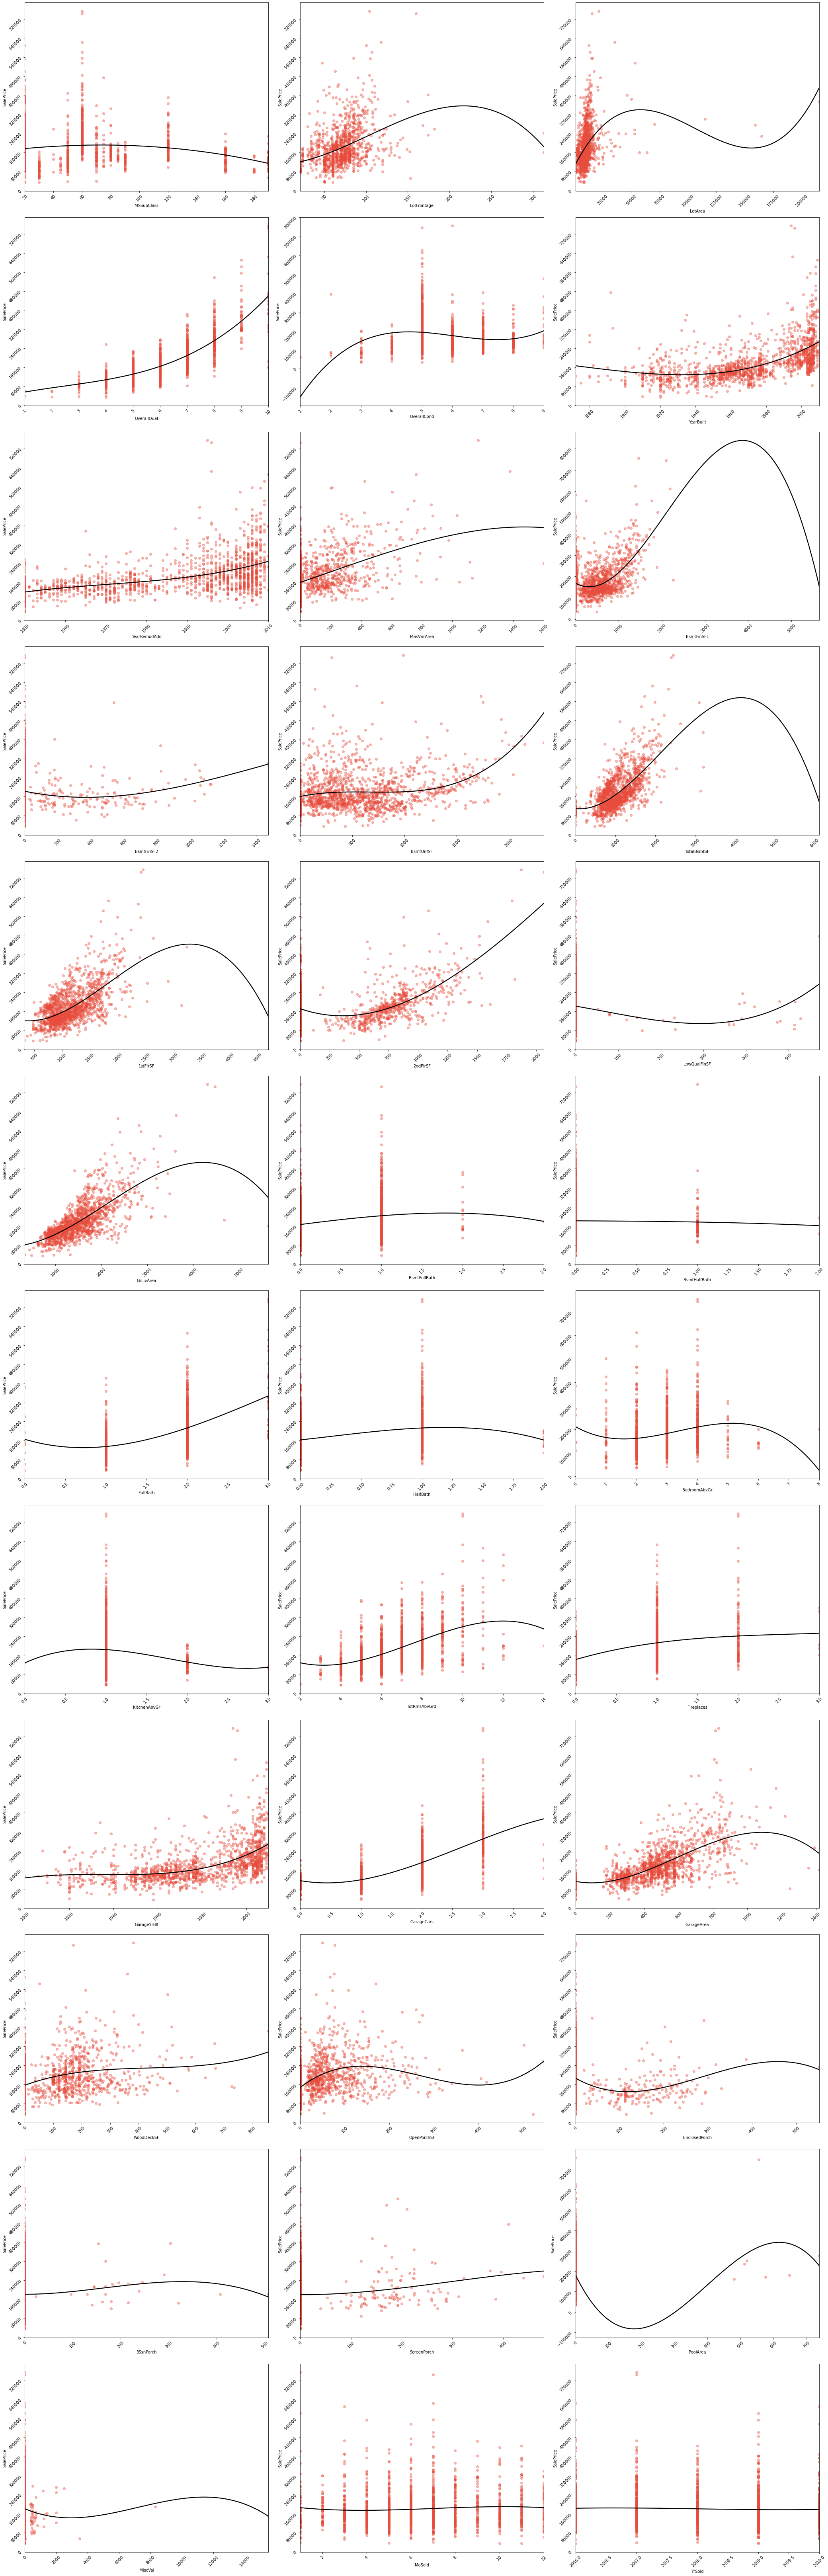

In [24]:
srt_reg('SalePrice', train)

In [25]:
# Dropping outliers after detecting them by eye.

train_features = train_features.join(y)
train_features = train_features.drop(train_features[(train_features['OverallQual'] < 5)
                                  & (train_features['SalePrice'] > 200000)].index)
train_features = train_features.drop(train_features[(train_features['GrLivArea'] > 4000)
                                  & (train_features['SalePrice'] < 200000)].index)
train_features = train_features.drop(train_features[(train_features['GarageArea'] > 1200)
                                  & (train_features['SalePrice'] < 200000)].index)
train_features = train_features.drop(train_features[(train_features['TotalBsmtSF'] > 3000)
                                  & (train_features['SalePrice'] > 320000)].index)
train_features = train_features.drop(train_features[(train_features['1stFlrSF'] < 3000)
                                  & (train_features['SalePrice'] > 600000)].index)
train_features = train_features.drop(train_features[(train_features['1stFlrSF'] > 3000)
                                  & (train_features['SalePrice'] < 200000)].index)

y = train_features['SalePrice']
y.dropna(inplace=True)
train_features.drop(columns='SalePrice', inplace=True)

In [26]:
# Creating new features  based on previous observations. There might be some highly correlated features now. You cab drop them if you want to...

train_features['TotalSF'] = (train_features['BsmtFinSF1'] + train_features['BsmtFinSF2'] +
                       train_features['1stFlrSF'] + train_features['2ndFlrSF'])
train_features['TotalBathrooms'] = (train_features['FullBath'] +
                              (0.5 * train_features['HalfBath']) +
                              train_features['BsmtFullBath'] +
                              (0.5 * train_features['BsmtHalfBath']))

train_features['TotalPorchSF'] = (train_features['OpenPorchSF'] + train_features['3SsnPorch'] + train_features['EnclosedPorch'] + train_features['ScreenPorch'] + train_features['WoodDeckSF'])

train_features['YearBlRm'] = (train_features['YearBuilt'] + train_features['YearRemodAdd'])

# Merging quality and conditions.

train_features['TotalExtQual'] = (train_features['ExterQual'] + train_features['ExterCond'])
train_features['TotalBsmQual'] = (train_features['BsmtQual'] + train_features['BsmtCond'] + train_features['BsmtFinType1'] + train_features['BsmtFinType2'])
train_features['TotalGrgQual'] = (train_features['GarageQual'] + train_features['GarageCond'])
train_features['TotalQual'] = train_features['OverallQual'] + train_features['TotalExtQual'] + train_features['TotalBsmQual'] + train_features['TotalGrgQual'] + train_features['KitchenQual'] + train_features['HeatingQC']

# Creating new features by using new quality indicators.

train_features['QualGr'] = train_features['TotalQual'] * train_features['GrLivArea']
train_features['QualBsm'] = train_features['TotalBsmQual'] * (train_features['BsmtFinSF1'] + train_features['BsmtFinSF2'])
train_features['QualPorch'] = train_features['TotalExtQual'] * train_features['TotalPorchSF']
train_features['QualExt'] = train_features['TotalExtQual'] * train_features['MasVnrArea']
train_features['QualGrg'] = train_features['TotalGrgQual'] * train_features['GarageArea']
train_features['QlLivArea'] = (train_features['GrLivArea'] -
                         train_features['LowQualFinSF']) * (train_features['TotalQual'])

train_features['QualSFNg'] = train_features['QualGr'] * train_features['Neighborhood']

In [28]:
train_features.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,TotalBsmQual,TotalGrgQual,TotalQual,QualGr,QualBsm,QualPorch,QualExt,QualGrg,QlLivArea,QualSFNg
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,14,6,43,73530,9884,427,1372.0,3288,73530,367650
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,13,6,39,49218,12714,1788,0.0,2760,49218,344526
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,14,6,43,76798,6804,294,1134.0,3648,76798,383990
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,13,6,40,68680,2808,1842,0.0,3852,68680,412080
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,14,6,44,96712,9170,1932,2450.0,5016,96712,967120


KeyError: 'SalePrice'

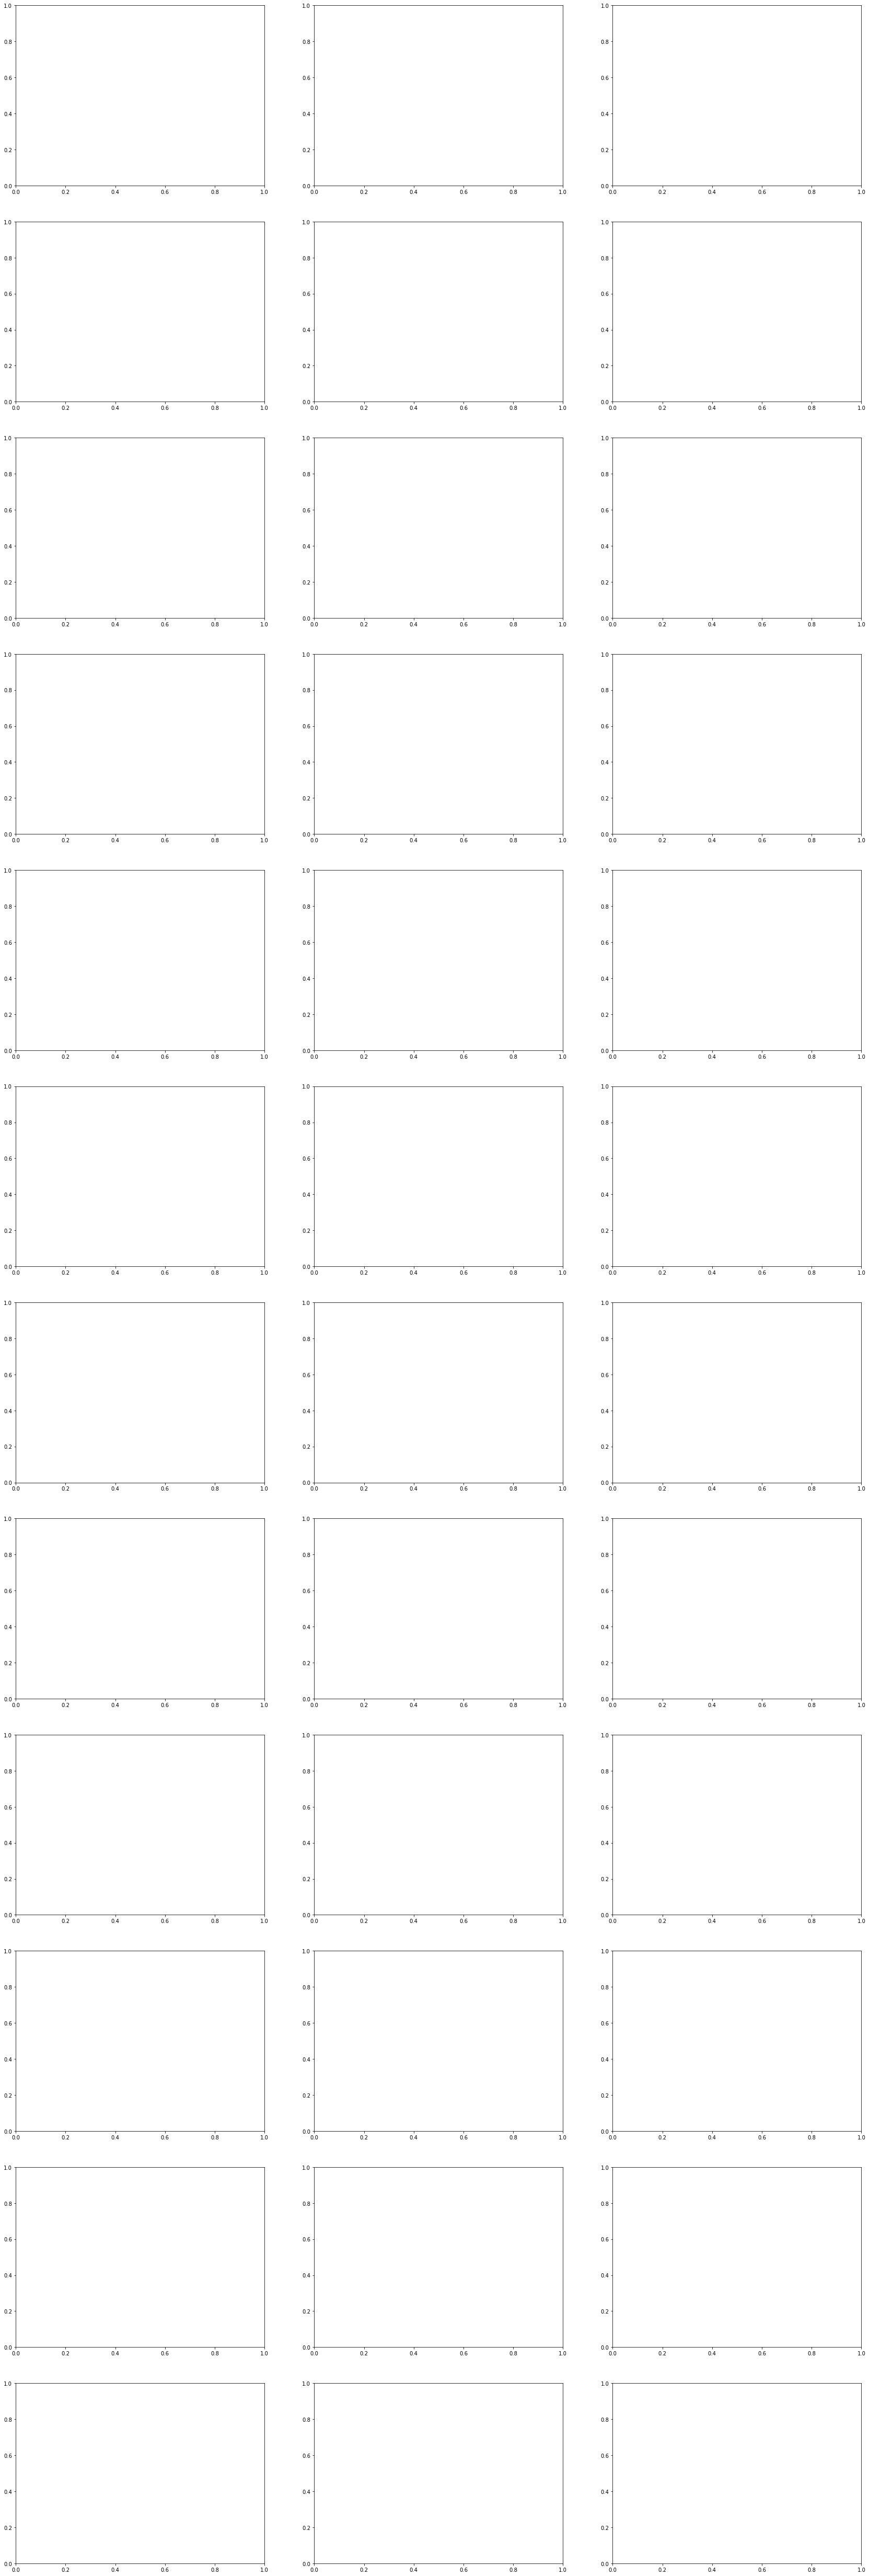

In [27]:
srt_reg('SalePrice',train_features)

In [ ]:
train_features['HasPool'] = train_features['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
train_features['Has2ndFloor'] = train_features['2ndFlrSF'].apply(lambda x: 1
                                                     if x > 0 else 0)
train_features['HasGarage'] = train_features['QualGrg'].apply(lambda x: 1 if x > 0 else 0)
train_features['HasBsmt'] = train_features['QualBsm'].apply(lambda x: 1 if x > 0 else 0)
train_features['HasFireplace'] = train_features['Fireplaces'].apply(lambda x: 1
                                                        if x > 0 else 0)
train_features['HasPorch'] = train_features['QualPorch'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
# Numerical features we worked on which seems highly skewed but we filter again anyways...

skewed = [
    'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
    'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
    'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
    'ScreenPorch', 'PoolArea', 'LowQualFinSF', 'MiscVal'
]

In [ ]:
# Finding skewness of the numerical features.

skew_features = np.abs(train_features[skewed].apply(lambda x: skew(x)).sort_values(
    ascending=False))

# Filtering skewed features.

high_skew = skew_features[skew_features > 0.3]

# Taking indexes of high skew.

skew_index = high_skew.index

# Applying boxcox transformation to fix skewness.

for i in skew_index:
    train_features[i] = boxcox1p(train_features[i], boxcox_normmax(train_features[i] + 1))

In [ ]:
# Features to drop:

to_drop = [
    'Utilities',
    'PoolQC',
    'YrSold',
    'MoSold',
    'ExterQual',
    'BsmtQual',
    'GarageQual',
    'KitchenQual',
    'HeatingQC',
]

# Dropping features.

train_features.drop(columns=to_drop, inplace=True)

In [ ]:
# Getting dummy variables for categorical data.

train_features = pd.get_dummies(data=train_features)

In [ ]:
train_features.head()

In [78]:
print(f'Number of missing values: {train_features.isna().sum().sum()}')

Number of missing values: 0


In [80]:
train_features.shape

(1449, 220)

In [82]:
train_features.sample(5)

,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterCond,BsmtCond,...,SaleType_COD,SaleType_New,SaleType_Other,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1328,13.456846,9.297920,2,6,7,1920,1950,0.000000,4,3,...,0,0,0,1,0,0,0,0,1,0
505,13.456846,8.976928,2,5,5,1952,1952,26.876030,3,3,...,1,0,0,0,0,0,0,0,1,0
881,11.291343,9.576567,8,7,5,1990,1991,15.738524,4,3,...,0,0,0,1,0,0,0,0,1,0
909,22.151362,9.486901,5,6,5,2005,2005,0.000000,3,3,...,0,0,0,1,0,0,0,0,1,0
1251,16.694455,8.084637,10,7,5,2003,2003,18.482121,3,3,...,0,0,0,1,0,0,0,0,1,0


In [83]:
train_features.describe()

,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterCond,BsmtCond,...,SaleType_COD,SaleType_New,SaleType_Other,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,...,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000
mean,14.452764,9.146371,4.478951,6.084886,5.579710,1971.146998,1984.797101,8.455773,3.082816,2.934438,...,0.029676,0.082126,0.018634,0.869565,0.069013,0.002761,0.008282,0.013803,0.821946,0.084196
std,2.463847,0.514172,2.426774,1.357545,1.114645,30.211749,20.655962,11.394524,0.350672,0.554223,...,0.169749,0.274651,0.135274,0.336897,0.253564,0.052486,0.090657,0.116711,0.382690,0.277777
min,7.317705,7.197548,1.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.456846,8.964093,3.000000,5.000000,5.000000,1954.000000,1966.000000,0.000000,3.000000,3.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,14.665866,9.197348,5.000000,6.000000,5.000000,1972.000000,1993.000000,0.000000,3.000000,3.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,15.791632,9.395549,5.000000,7.000000,6.000000,2000.000000,2004.000000,18.427528,3.000000,3.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,32.836129,12.357850,10.000000,10.000000,9.000000,2010.000000,2010.000000,53.041031,5.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [85]:
# Separating train and test set.

train = train_features.iloc[:len(y), :]
test = train_features.iloc[len(train):, :]

In [87]:
len(y)

1449

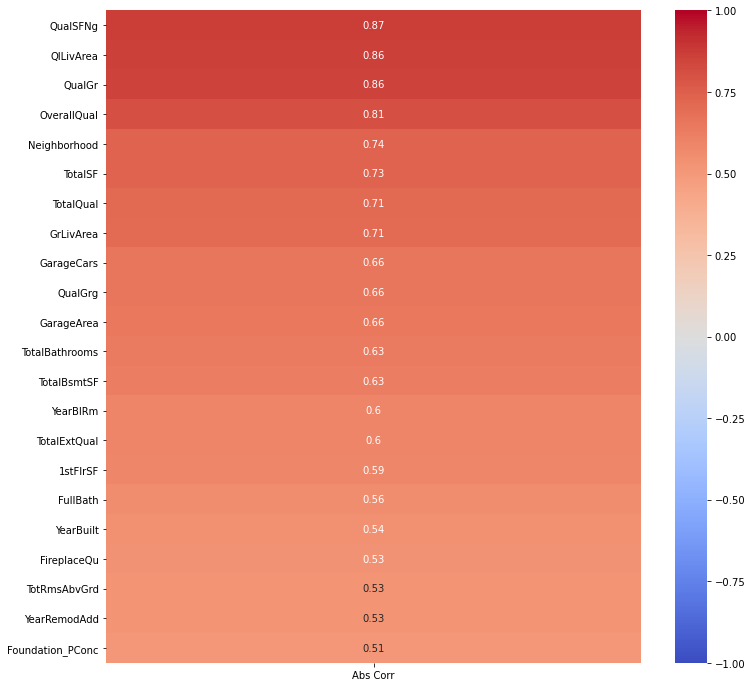

In [86]:
correlations = train.join(y).corrwith(train.join(y)['SalePrice']).iloc[:-1].to_frame()
correlations['Abs Corr'] = correlations[0].abs()
sorted_correlations = correlations.sort_values('Abs Corr', ascending=False)['Abs Corr']
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(sorted_correlations.to_frame()[sorted_correlations>=.5], cmap='coolwarm', annot=True, vmin=-1, vmax=1, ax=ax);

In [90]:
def plot_dist3(df, feature, title):
    
    # Creating a customized chart. and giving in figsize and everything.
    
    fig = plt.figure(constrained_layout=True, figsize=(12, 8))
    
    # creating a grid of 3 cols and 3 rows.
    
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)

    # Customizing the histogram grid.
    
    ax1 = fig.add_subplot(grid[0, :2])
    
    # Set the title.
    
    ax1.set_title('Histogram')
    
    # plot the histogram.
    
    sns.distplot(df.loc[:, feature],
                 hist=True,
                 kde=True,
                 fit=norm,
                 ax=ax1,
                 color='#e74c3c')
    ax1.legend(labels=['Normal', 'Actual'])

    # customizing the QQ_plot.
    
    ax2 = fig.add_subplot(grid[1, :2])
    
    # Set the title.
    
    ax2.set_title('Probability Plot')
    
    # Plotting the QQ_Plot.
    stats.probplot(df.loc[:, feature].fillna(np.mean(df.loc[:, feature])),
                   plot=ax2)
    ax2.get_lines()[0].set_markerfacecolor('#e74c3c')
    ax2.get_lines()[0].set_markersize(12.0)

    # Customizing the Box Plot:
    
    ax3 = fig.add_subplot(grid[:, 2])
    # Set title.
    
    ax3.set_title('Box Plot')
    
    # Plotting the box plot.
    
    sns.boxplot(df.loc[:, feature], orient='v', ax=ax3, color='#e74c3c')
    ax3.yaxis.set_major_locator(MaxNLocator(nbins=24))

    plt.suptitle(f'{title}', fontsize=24)

/Users/lucasshwed/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  fig.canvas.print_figure(bytes_io, **kw)


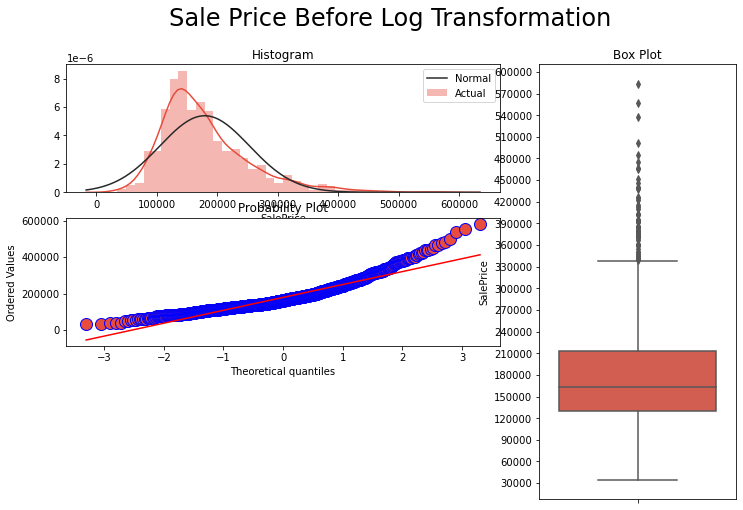

In [91]:
# Checking target variable.

plot_dist3(train.join(y), 'SalePrice', 'Sale Price Before Log Transformation')

In [93]:
# Setting model data.

X = train
X_test = test
y = np.log1p(y)

/Users/lucasshwed/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  fig.canvas.print_figure(bytes_io, **kw)


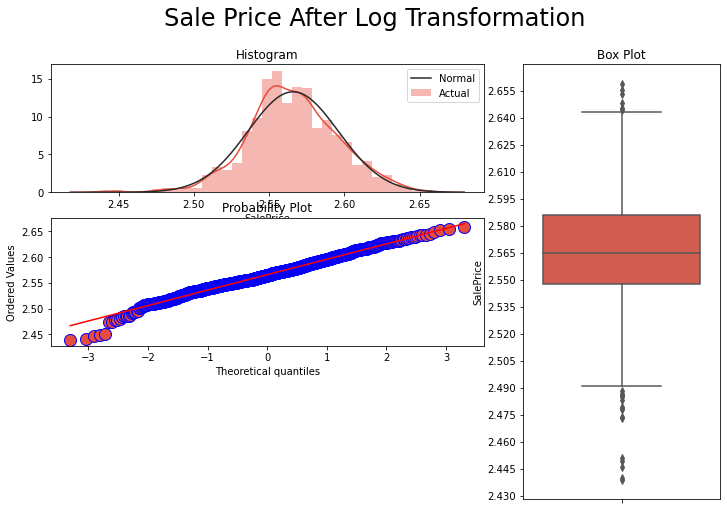

In [94]:
plot_dist3(train.join(y), 'SalePrice', 'Sale Price After Log Transformation')

In [1]:
# Loading neccesary packages for modelling.

from sklearn.model_selection import cross_val_score, KFold, cross_validate
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV 
from sklearn.linear_model import TweedieRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from mlxtend.regressor import StackingCVRegressor # This is for stacking part, works well with sklearn and others...

XGBoostError: XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed (vcomp140.dll or libgomp-1.dll for Windows, libomp.dylib for Mac OSX, libgomp.so for Linux and other UNIX-like OSes). Mac OSX users: Run `brew install libomp` to install OpenMP runtime.
  * You are running 32-bit Python on a 64-bit OS
Error message(s): ['dlopen(/Users/lucasshwed/opt/anaconda3/lib/python3.7/site-packages/xgboost/lib/libxgboost.dylib, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib\n  Referenced from: /Users/lucasshwed/opt/anaconda3/lib/python3.7/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: image not found']


In [97]:
kf = KFold(10, random_state=42)

/Users/lucasshwed/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [2]:
import sklearn
sklearn.__version__

'0.23.2'

In [98]:
# Some parameters for ridge, lasso and elasticnet.

alphas_alt = [15.5, 15.6, 15.7, 15.8, 15.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas2 = [
    5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008
]
e_alphas = [
    0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007
]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

# ridge_cv

ridge = make_pipeline(RobustScaler(), RidgeCV(
    alphas=alphas_alt,
    cv=kf,
))

# lasso_cv:

lasso = make_pipeline(
    RobustScaler(),
    LassoCV(max_iter=1e7, alphas=alphas2, random_state=42, cv=kf))

# elasticnet_cv:

elasticnet = make_pipeline(
    RobustScaler(),
    ElasticNetCV(max_iter=1e7,
                 alphas=e_alphas,
                 cv=kf,
                 random_state=42,
                 l1_ratio=e_l1ratio))

# svr:

svr = make_pipeline(RobustScaler(),
                    SVR(C=21, epsilon=0.0099, gamma=0.00017, tol=0.000121))

# gradientboosting:

gbr = GradientBoostingRegressor(n_estimators=2900,
                                learning_rate=0.0161,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=17,
                                loss='huber',
                                random_state=42)

# lightgbm:

lightgbm = LGBMRegressor(objective='regression',
                         n_estimators=3500,
                         num_leaves=5,
                         learning_rate=0.00721,
                         max_bin=163,
                         bagging_fraction=0.35711,
                         n_jobs=-1,
                         bagging_seed=42,
                         feature_fraction_seed=42,
                         bagging_freq=7,
                         feature_fraction=0.1294,
                         min_data_in_leaf=8)

# xgboost:

xgboost = XGBRegressor(
    learning_rate=0.0139,
    n_estimators=4500,
    max_depth=4,
    min_child_weight=0,
    subsample=0.7968,
    colsample_bytree=0.4064,
    nthread=-1,
    scale_pos_weight=2,
    seed=42,
)


# hist gradient boosting regressor:

hgrd= HistGradientBoostingRegressor(    loss= 'least_squares',
    max_depth= 2,
    min_samples_leaf= 40,
    max_leaf_nodes= 29,
    learning_rate= 0.15,
    max_iter= 225,
                                    random_state=42)

# tweedie regressor:
 
tweed = make_pipeline(RobustScaler(),TweedieRegressor(alpha=0.005))


# stacking regressor:

stack_gen = StackingCVRegressor(regressors=(ridge, lasso, elasticnet, gbr,
                                            xgboost, lightgbm,hgrd, tweed),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)


NameError: name 'make_pipeline' is not defined

In [100]:
def model_check(X, y, estimators, cv):
    
    ''' A function for testing multiple estimators.'''
    
    model_table = pd.DataFrame()

    row_index = 0
    for est, label in zip(estimators, labels):

        MLA_name = label
        model_table.loc[row_index, 'Model Name'] = MLA_name

        cv_results = cross_validate(est,
                                    X,
                                    y,
                                    cv=cv,
                                    scoring='neg_root_mean_squared_error',
                                    return_train_score=True,
                                    n_jobs=-1)

        model_table.loc[row_index, 'Train RMSE'] = -cv_results[
            'train_score'].mean()
        model_table.loc[row_index, 'Test RMSE'] = -cv_results[
            'test_score'].mean()
        model_table.loc[row_index, 'Test Std'] = cv_results['test_score'].std()
        model_table.loc[row_index, 'Time'] = cv_results['fit_time'].mean()

        row_index += 1

    model_table.sort_values(by=['Test RMSE'],
                            ascending=True,
                            inplace=True)

    return model_table

In [101]:
# Setting list of estimators and labels for them:

estimators = [ridge, lasso, elasticnet, gbr, xgboost, lightgbm, svr, hgrd, tweed]
labels = [
    'Ridge', 'Lasso', 'Elasticnet', 'GradientBoostingRegressor',
    'XGBRegressor', 'LGBMRegressor', 'SVR', 'HistGradientBoostingRegressor','TweedieRegressor'
]

NameError: name 'ridge' is not defined